**Computational Linear Algebra for Large Scale Problems**

**Spectral Clustering (HW_SC)**

**Fatemeh Ahmadvand**

**Student Number: s301384**

**Email:  fatemeh.ahmadvand@studenti.polito.it**

# Introduction

Clustering is a popular unsupervised learning technique. The grouping is such that points in a cluster are similar to each other, and less similar to points in other clusters.There are two broad approaches for clustering:

**1. Compactness** — Points that lie close to each other fall in the same cluster and are compact around the cluster center. The closeness can be measured by the distance between the observations. E.g.: **K-Means Clustering**

**2. Connectivity** — Points that are connected or immediately next to each other are put in the same cluster. Even if the distance between 2 points is less, if they are not connected, they are not clustered together. **Spectral clustering** is a technique that follows this approach.

# Project Description

To perform a spectral clustering I need three main steps:

**step (1)-Create a similarity graph between our N objects to cluster.**
In order to represent the data, I first construct an undirected graph $G = (V, E)$ with vertex sets $V = v_1, ..., v_n$. This can be represented by an adjacency matrix which has the similarity between each vertex as its elements .
In the similarity graph each vertex $v_i ∈ V$ represents a data point $X_i$. An edge between two vertices $v_i$ and $v_j$ exists if the similarity $s_{ij}$ between the corresponding data points $X_i$ and $X_j$ is either positive or larger than a certain threshold (minimum similarity value $ϵ$ for a connection to take place between two data points). I assume that $s_{ij} = s_{ji}$ and that the edge connecting $v_i$ and $v_j$ is weighted by $s_{ij}$ . Consequently, it turns out that the similarity graph is undirected. The weighted adjacency matrix is defined as $W_{ij} = s_{ij}$ , if $i ̸= j$
and $W_{ij} = 0$, if $i = j$. One way to compute a similarity graph is to create *Fully connected graph*. I simply connect all points and weight all edges based on their similarity $s_{ij}$ and apply similarity functions such as the Gaussian similarity function to model the local neighborhood relationships in this graph.

$$
\boldsymbol{s_{i,j} = exp \Bigg(\frac{|| X_i,X_j ||^2}{2σ^2}  \Bigg)}
$$
the parameter $σ$ controls the width of the neighborhoods. **_(Question 1)_**

**step (2)-Compute the first k eigenvectors of its Laplacian matrix to define a feature vector for each object.** I want to transform the space so that when two points are close together, they always belong to the same cluster, and when they are far away, they belong to distinct clusters. My observations must be projected into a low-dimensional space. I calculate the Graph Laplacian matrices for this.This is the main tool for spectral clustering. 

$$
\boldsymbol{L = D - W}
$$
where $L$ is Laplacian matrix, $D$ is the degree matrix and $W$ is the adjacency matrix of the graph.The Laplacian’s diagonal is the degree of our nodes, and the off diagonal is the negative edge weights. This is the representation I am after for performing spectral clustering.**_(Question 2)_**

To determine how many connected components there are in the similarity graph, I compute the cosine similarity.**_(Question 3)_**

$$
\boldsymbol{Cosine Similarity := cos(\theta) = \frac{a_i.b_i}{\|a_i\|.\|b_i\|}}
$$

The goal of computing the Graph Laplacian $L$ is to find eigenvalues and eigenvectors for it so that the data points can be embedded in a low-dimensional space. So in this step, I can go ahead and calculate eigenvalues. 
$$
\boldsymbol{L\lambda = \lambda v}
$$
where $v$ is the eigenvector of $L$ corresponding to eigenvalue $\lambda$. Thus I get eigenvalues {$\lambda_1,\lambda_2, ..., \lambda_n $} , where $0 =\lambda_1 \le\lambda_2\le ...\le \lambda_n $ (*Spectrum of the Laplacian*) and eigenvectors {$v_1,v_2,...,v_n$}.

The eigenvalues of the Graph Laplacian can then be used to find the best number of clusters, and the eigenvectors can be used to find the actual cluster labels.**_(Question 4)_**


**step (3)-Run k-means on these features to separate objects into k classes.**

The final three questions, which are used to implement the three stages of K-means, are as follows:
- creating a matrix $U ∈ \mathbb{R}^{N×M}$ with these vectors as columns by computing the $M$ eigenvectors $u_1, ..., u_M ∈ \mathbb{R}^N$ that correspond to the $M$ smallest eigenvalues of the Laplacian matrix.**_(Question 5)_**

- For $i = 1, ..., N$ let $y_i ∈ \mathbb{R}^{M}$ be the vector corresponding to the $i$-th row of $U$. Clustering the points $y_i$ , $i = 1, ..., N$ in $\mathbb{R}^{M}$ with the k-means algorithm into clusters $C_1, ..., C_M$.**_(Question 6)_**

- Assigning the original points in $X$ to the same clusters as their corresponding rows in $U$ and construct the clusters $A_1, ..., A_M$, with $A_i = {x_j : y_j ∈ C_i}$.**_(Question 7)_**

After applying thses three k-means steps, I plot the clusters of points with different colors.**_(Question 8)_**

I use two methodes for clustering, first I apply *k-means* and then *Spectral Clustering* **_(Question 9)_**

As you can see in the K-means plots, the dataset clustered into 3 clusters perfectly.

I have two datasets named *Circle.csv* and *Spiral.csv* contain totaling N points that I will be using. The x-values and y-values of the points are listed in two columns in the Circle dataset, and the index of the correct cluster is listed in the third column of the Spiral dataset.

I do the nine tasks for *Cricle* dataset and *Spiral* dataset with different values of $K = 10, 20, 40$ ,  $σ = 1$ seperately as below.

# Import library

First of all, I start with the importation of the modules.

In [1]:
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt

For the entire notebook, I define the decimal number up to three decimal places.

In [2]:
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
#from sklearn.datasets.samples_generator import make_circles
sns.set()

#  load the *Circle* Dataset (CD)

In [3]:
df=pd.read_csv('Circle.csv',names=["a", "b"], encoding='latin-1')
df

,a,b
0,2.7147,0.81472
1,2.8054,0.94572
2,2.0253,0.20682
3,2.8096,1.03310
4,2.5257,0.79188
...,...,...
895,5.8968,-4.19650
896,3.5603,-8.78640
897,7.0303,-8.00040
898,5.4921,-5.49120


## $\boldsymbol{k=10}$ in Circle dataset

**Question1 ($\boldsymbol{k=10}$ , CD)**

In [4]:
#construct the k-nearest neighborhood similarity graph and its adjacency matrix 
from sklearn.neighbors import radius_neighbors_graph
W = radius_neighbors_graph(df,1,mode='distance', metric='minkowski', p=10, metric_params=None, include_self=False) # p=k=10
W = W.toarray()
print("The adjacency matrix is: ")
print(W)

The adjacency matrix is: 
[[0.000 0.131 0.707 ... 0.000 0.000 0.000]
 [0.131 0.000 0.817 ... 0.000 0.000 0.000]
 [0.707 0.817 0.000 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 0.000]]


In [5]:
#Constructing the degree matrix (𝐷)
D = np.diag(W.sum(axis=1))
print(D)

[[32.094 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 28.044 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 28.075 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 15.605 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 48.593 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 6.244]]


**Question2 ($\boldsymbol{k=10}$ , CD)**

In [6]:
from scipy.sparse import csgraph

# with the function below we can get the Laplacian Matrix(L=D-W) from the adjacency matrix we have from previous section
L = csgraph.laplacian(W, normed=False)

print('The Laplacian Matrix L is: ')
print(L)

print('The first 5 values of L are: ')
print(L[:5,:5])

The Laplacian Matrix L is: 
[[32.094 -0.131 -0.707 ... -0.000 -0.000 -0.000]
 [-0.131 28.044 -0.817 ... -0.000 -0.000 -0.000]
 [-0.707 -0.817 28.075 ... -0.000 -0.000 -0.000]
 ...
 [-0.000 -0.000 -0.000 ... 15.605 -0.000 -0.000]
 [-0.000 -0.000 -0.000 ... -0.000 48.593 -0.000]
 [-0.000 -0.000 -0.000 ... -0.000 -0.000 6.244]]
The first 5 values of L are: 
[[32.094 -0.131 -0.707 -0.218 -0.189]
 [-0.131 28.044 -0.817 -0.087 -0.280]
 [-0.707 -0.817 28.075 -0.866 -0.596]
 [-0.218 -0.087 -0.866 27.103 -0.289]
 [-0.189 -0.280 -0.596 -0.289 33.225]]


**Question3 ($\boldsymbol{k=10}$ , CD)** 

In [7]:
#compute the cosine similarity to determine how many connected components there are in the similarity graph
# import required libraries
from numpy.linalg import norm
 
# compute  similarity
cosine = np.dot(df['a'],df['b'])/(norm(df['a'],)*norm(df['b']))
print("Cosine Similarity is : ", cosine)

Cosine Similarity is :  -0.7272658115521661


**Question4 ($\boldsymbol{k=10}$ , CD)**

In [8]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# normalised eigenvectors
print('M eigenvectors:')
print(v)

eigenvalues:
[76.405 74.645 73.200 69.831 69.681 69.190 68.663 68.192 67.823 67.570
 67.187 66.872 66.493 66.518 66.202 65.596 65.629 65.055 64.794 64.638
 64.514 64.032 63.601 63.452 63.124 62.725 62.804 62.347 62.183 62.021
 61.866 61.380 61.245 61.069 60.888 60.728 60.407 60.315 60.063 59.538
 59.118 59.459 57.638 58.916 58.725 58.736 58.521 58.360 58.381 57.395
 57.121 57.046 56.703 55.935 55.231 55.740 55.639 54.714 54.400 54.217
 53.984 0.852 53.561 53.290 53.393 0.008 53.049 52.819 52.630 52.490
 52.326 52.437 52.026 51.901 0.000 -0.000 47.110 51.620 51.564 51.507
 48.130 51.379 50.667 50.711 51.185 51.033 51.059 50.356 50.210 49.219
 49.648 50.950 50.276 49.518 48.520 48.901 48.841 48.652 49.460 48.214
 0.154 0.214 0.435 0.810 0.994 1.127 1.393 1.558 1.732 2.004 1.829 1.777
 2.126 2.602 3.031 3.386 47.564 47.625 47.408 47.014 47.309 45.721 46.791
 46.667 46.618 46.391 46.356 44.823 45.474 45.723 45.736 45.068 44.996
 44.906 44.778 44.680 44.629 40.021 44.500 44.372 44.362 43.09

**Question5 ($\boldsymbol{k=10}$ , CD)**

In [9]:
# construct the matrix U 
u=v+L
print("the U matrix is: ")
print(u)

the U matrix is: 
[[32.094 -0.131 -0.707 ... 0.000 -0.000 -0.000]
 [-0.131 28.044 -0.817 ... 0.000 0.000 -0.000]
 [-0.707 -0.817 28.075 ... 0.000 0.000 -0.000]
 ...
 [-0.004 0.001 0.004 ... 15.624 -0.001 0.007]
 [0.050 0.050 0.037 ... 0.011 48.611 0.022]
 [0.000 0.001 0.001 ... -0.006 -0.001 6.242]]


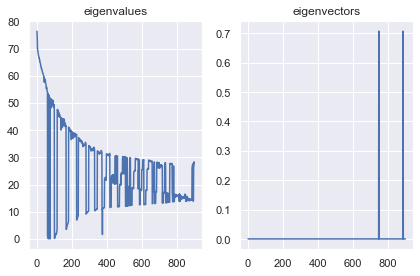

In [10]:
# eigenvalues and eigen vector plot
fig = plt.figure()
ax1 = plt.subplot(121)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 10e-6)[0]
ax2 = plt.subplot(122)
plt.plot(v[:, i[0]])
ax2.title.set_text('eigenvectors')

fig.tight_layout()
plt.show()

In [11]:
df=pd.read_csv('Circle.csv',names=["a", "b"], encoding='latin-1')

I run the k-means algorithm on the circle dataset to try to get some clusters. I select the number of cluster using the elbow method by considering the inertia (sum of squared distances of samples to their closest cluster center) as a function of the number of clusters.

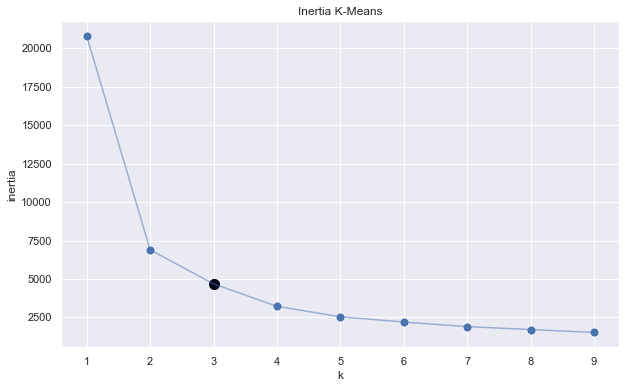

In [12]:
from sklearn.cluster import KMeans
import seaborn as sns
inertias = []

k_candidates = range(1, 10)

for k in k_candidates:
    k_means = KMeans(random_state=42, n_clusters=k)
    k_means.fit(df)
    inertias.append(k_means.inertia_)

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=k_candidates, y = inertias, s=80, ax=ax)
sns.scatterplot(x=[k_candidates[2]], y = [inertias[2]], c=[3], s=150, ax=ax)
sns.lineplot(x=k_candidates, y = inertias, alpha=0.5, ax=ax)
ax.set(title='Inertia K-Means', ylabel='inertia', xlabel='k');

From this plot we see that $K=3$ is a good choice. Now I get the clusters.

**Question 6,7,8,9 ($\boldsymbol{k=10}$ , CD)**

In [13]:
#Compute the clusters for the Circle dataset with K-means method 
algorithm = (KMeans(n_clusters = 3,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 50  , algorithm='elkan') )
algorithm.fit(df)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [14]:
X1 = df[['a','b']].iloc[: , :].values

In [15]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

c:\users\sadaf\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


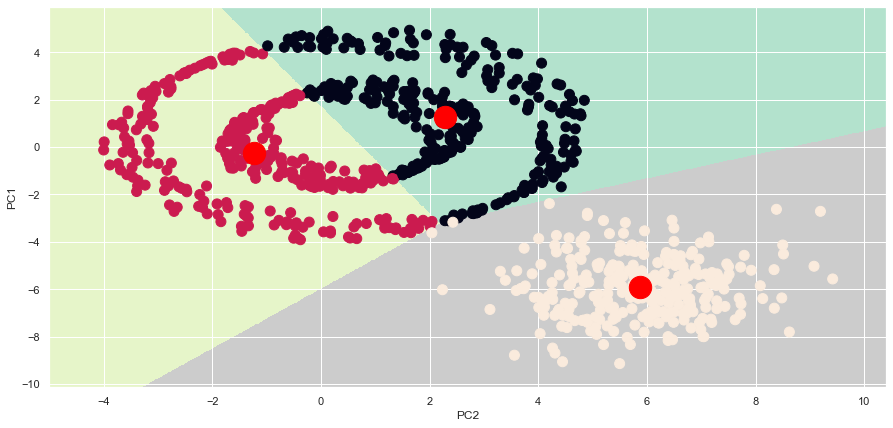

In [16]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'a', y = 'b', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 500, c = 'red' , alpha = 1)
plt.ylabel('PC1') , plt.xlabel('PC2')
plt.show()

c:\users\sadaf\appdata\local\programs\python\python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


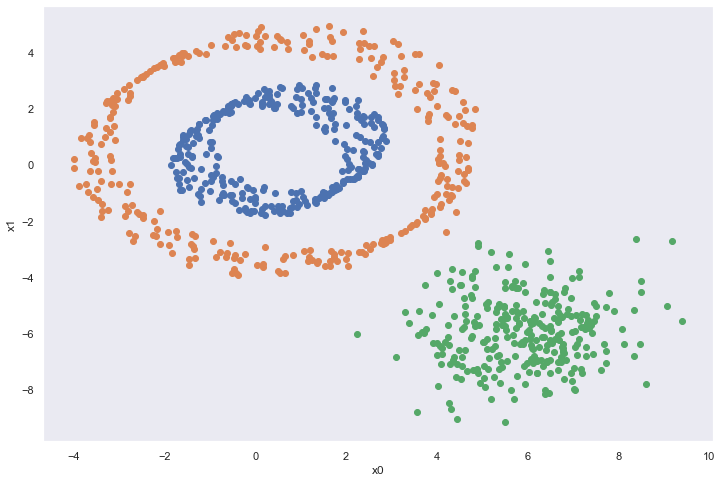

In [17]:
#Compute the clusters for the Circle dataset with clustering method 
from sklearn.cluster import SpectralClustering
sine_dataset = pd.DataFrame(df)

## Fitting spectral clustering with 3 clusters
spectral_clustering = SpectralClustering(n_clusters = 3, 
                                         affinity = 'nearest_neighbors',
                                         n_neighbors = 10).fit(df) 

## Appending cluster to the sine dataset
sine_dataset['spectral_clusters'] = spectral_clustering.labels_


## Visualizing the data with cluster
colors = ['lightblue', 'orange']

plt.figure(figsize = (12, 8))
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()

for c in sine_dataset['spectral_clusters'].unique():
        
        temp = sine_dataset[sine_dataset['spectral_clusters'] == c]
        plt.scatter(temp['a'], temp['b'])

## $\boldsymbol{k=20}$ in Circle dataset

**Question1 ($\boldsymbol{k=20}$ , CD)**

In [18]:
#construct the k-nearest neighborhood similarity graph and its adjacency matrix 
from sklearn.neighbors import radius_neighbors_graph
W = radius_neighbors_graph(df,1,mode='distance', metric='minkowski', p=20, metric_params=None, include_self=False) # k=p=20
W = W.toarray()
print("The adjacency matrix is: ")
W

The adjacency matrix is: 


array([[0.000, 0.131, 0.692, ..., 0.000, 0.000, 0.000],
       [0.131, 0.000, 0.792, ..., 0.000, 0.000, 0.000],
       [0.692, 0.792, 0.000, ..., 0.000, 0.000, 0.000],
       ...,
       [0.000, 0.000, 0.000, ..., 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, ..., 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, ..., 0.000, 0.000, 0.000]])

In [19]:
#Constructing the degree matrix (𝐷)
D = np.diag(W.sum(axis=1))
print(D)

[[32.030 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 26.968 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 27.967 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 15.527 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 50.316 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 6.224]]


**Question2 ($\boldsymbol{k=20}$ , CD)**

In [20]:
from scipy.sparse import csgraph

# with the function below we can get the Laplacian Matrix(L=D-W) from the adjacency matrix we have from previous section
L = csgraph.laplacian(W, normed=False)

print('The Laplacian Matrix L is: ')
print(L)

print('The first 5 values of L are: ')
print(L[:5,:5])

The Laplacian Matrix L is: 
[[32.030 -0.131 -0.692 ... -0.000 -0.000 -0.000]
 [-0.131 26.968 -0.792 ... -0.000 -0.000 -0.000]
 [-0.692 -0.792 27.967 ... -0.000 -0.000 -0.000]
 ...
 [-0.000 -0.000 -0.000 ... 15.527 -0.000 -0.000]
 [-0.000 -0.000 -0.000 ... -0.000 50.316 -0.000]
 [-0.000 -0.000 -0.000 ... -0.000 -0.000 6.224]]
The first 5 values of L are: 
[[32.030 -0.131 -0.692 -0.218 -0.189]
 [-0.131 26.968 -0.792 -0.087 -0.280]
 [-0.692 -0.792 27.967 -0.839 -0.586]
 [-0.218 -0.087 -0.839 25.038 -0.284]
 [-0.189 -0.280 -0.586 -0.284 33.121]]


**Question3 ($\boldsymbol{k=20}$ , CD)**

In [21]:
#compute the cosine similarity to determine how many connected components there are in the similarity graph
# import required libraries
from numpy.linalg import norm

# compute  similarity
cosine = np.dot(df['a'],df['b'])/(norm(df['a'],)*norm(df['b']))
print(" Similarity:", cosine)

 Similarity: -0.7272658115521661


**Question4 ($\boldsymbol{k=20}$ , CD)**

In [22]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# normalised eigenvectors
print('M eigenvectors:')
print(v)

eigenvalues:
[-0.000 2.129 2.257 7.401 8.816 48.232 47.265 14.992 45.819 16.325 44.724
 44.050 19.854 20.071 43.048 42.721 42.261 41.982 41.435 41.380 20.324
 20.844 41.105 40.885 21.136 40.491 21.315 40.162 21.571 40.035 21.464
 21.652 21.991 39.671 22.383 22.448 39.576 39.318 39.235 22.761 38.932
 38.918 38.641 38.609 38.316 38.225 38.138 37.911 37.755 37.515 37.579
 37.369 37.155 36.886 36.763 36.623 36.459 36.376 36.265 36.327 36.186
 36.009 35.956 34.511 35.916 35.865 35.693 35.401 35.571 35.510 35.756
 35.244 34.795 34.714 34.644 35.107 35.172 35.049 35.023 34.967 34.945
 23.300 23.283 23.853 23.924 24.080 24.326 24.370 24.532 24.690 24.745
 24.871 25.033 25.217 25.275 25.308 34.294 34.381 34.404 34.147 34.025
 33.896 33.840 33.777 33.708 33.665 33.656 33.590 33.405 33.475 33.513
 33.345 33.160 33.261 33.216 32.990 32.926 32.801 32.889 32.753 32.561
 32.623 32.667 32.484 31.892 32.395 32.378 32.199 32.232 32.451 31.986
 32.008 32.013 32.132 32.071 32.101 25.370 25.465 25.424 25.5

**Question5 ($\boldsymbol{k=20}$ , CD)**

In [23]:
# construct the matrix U 
u=v+L
print("the U matrix is: ")
print(u)

the U matrix is: 
[[32.088 -0.078 -0.755 ... 0.000 0.000 0.000]
 [-0.073 27.020 -0.859 ... 0.000 0.000 0.000]
 [-0.634 -0.721 27.925 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 15.534 0.003 0.011]
 [0.000 0.000 0.000 ... -0.002 50.313 -0.027]
 [0.000 0.000 0.000 ... -0.004 0.000 6.223]]


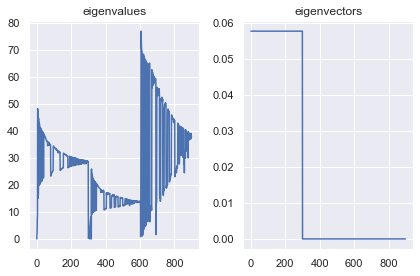

In [24]:
# eigenvalues and eigen vector plot
fig = plt.figure()
ax1 = plt.subplot(121)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 10e-6)[0]
ax2 = plt.subplot(122)
plt.plot(v[:, i[0]])
ax2.title.set_text('eigenvectors')
fig.tight_layout()
plt.show()

In [25]:
df=pd.read_csv('Circle.csv',names=["a", "b"], encoding='latin-1')

**Question 6,7,8,9 ($\boldsymbol{k=20}$ , CD)**

In [26]:
#Compute the clusters for the Circle dataset with K-means method 
algorithm = (KMeans(n_clusters = 3,init='k-means++', n_init = 20 ,max_iter=1000,
                        tol=0.0001,  random_state= 50  , algorithm='elkan') ) 
algorithm.fit(df)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [27]:
X1 = df[['a','b']].iloc[: , :].values

In [28]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

c:\users\sadaf\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


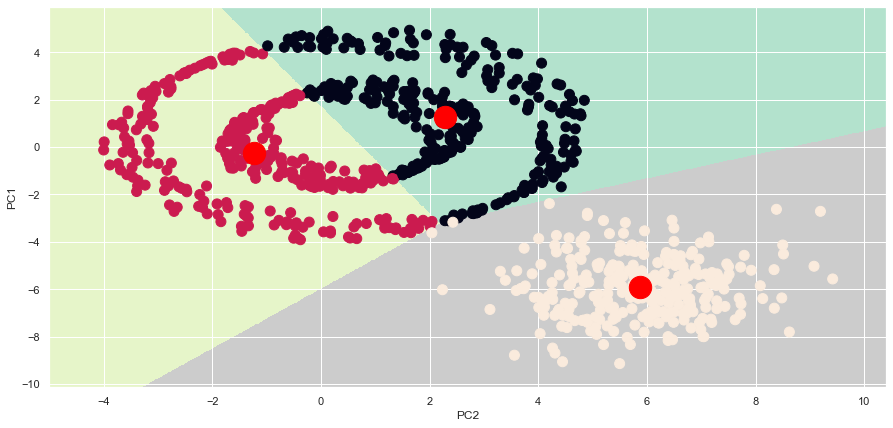

In [29]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'a', y = 'b', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 500, c = 'red' , alpha = 1)
plt.ylabel('PC1') , plt.xlabel('PC2')
plt.show()

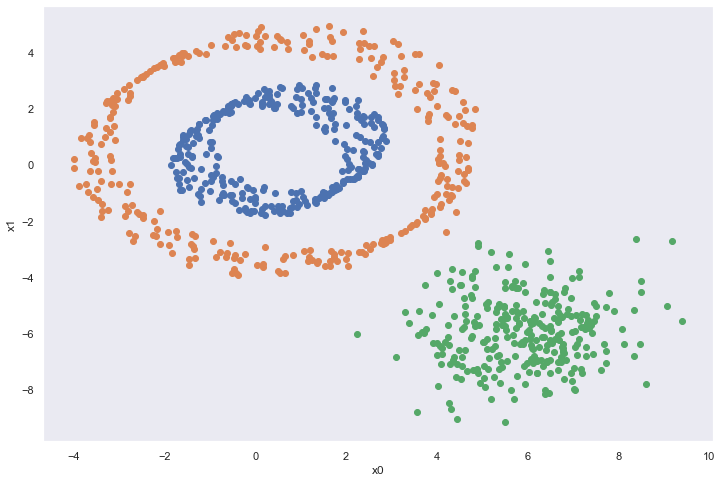

In [30]:
#Compute the clusters for the Circle dataset with clustering method 
from sklearn.cluster import SpectralClustering
sine_dataset = pd.DataFrame(df)

## Fitting spectral clustering with 3 clusters
spectral_clustering = SpectralClustering(n_clusters = 3, 
                                         affinity = 'nearest_neighbors',
                                         n_neighbors = 20).fit(df) 

## Appending cluster to the sine dataset
sine_dataset['spectral_clusters'] = spectral_clustering.labels_


## Visualizing the data with cluster
colors = ['lightblue', 'orange']

plt.figure(figsize = (12, 8))
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()

for c in sine_dataset['spectral_clusters'].unique():
        
        temp = sine_dataset[sine_dataset['spectral_clusters'] == c]
        plt.scatter(temp['a'], temp['b'])

## $\boldsymbol{k=40}$ in Circle dataset

**Question1 ($\boldsymbol{k=40}$ , CD)**

In [31]:
#construct the k-nearest neighborhood similarity graph and its adjacency matrix 
from sklearn.neighbors import radius_neighbors_graph
W = radius_neighbors_graph(df,1,mode='distance', metric='minkowski', p=40, metric_params=None, include_self=False) # k=p=40
W = W.toarray()
print("The adjacency matrix is: ")
W

The adjacency matrix is: 


array([[0.000, 0.131, 0.690, ..., 0.000, 0.000, 0.000],
       [0.131, 0.000, 0.782, ..., 0.000, 0.000, 0.000],
       [0.690, 0.782, 0.000, ..., 0.000, 0.000, 0.000],
       ...,
       [0.000, 0.000, 0.000, ..., 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, ..., 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, ..., 0.000, 0.000, 0.000]])

In [32]:
#Constructing the degree matrix (𝐷)
D = np.diag(W.sum(axis=1))
print(D)

[[32.019 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 26.952 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 27.940 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 15.506 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 50.238 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 6.221]]


**Question2 ($\boldsymbol{k=40}$ , CD)**

In [33]:
from scipy.sparse import csgraph

# with the function below we can get the Laplacian Matrix(L=D-W) from the adjacency matrix we have from previous section
L = csgraph.laplacian(W, normed=False)

print('The Laplacian Matrix L is: ')
print(L)

print('The first 5 values of L are: ')
print(L[:5,:5])

The Laplacian Matrix L is: 
[[32.019 -0.131 -0.690 ... -0.000 -0.000 -0.000]
 [-0.131 26.952 -0.782 ... -0.000 -0.000 -0.000]
 [-0.690 -0.782 27.940 ... -0.000 -0.000 -0.000]
 ...
 [-0.000 -0.000 -0.000 ... 15.506 -0.000 -0.000]
 [-0.000 -0.000 -0.000 ... -0.000 50.238 -0.000]
 [-0.000 -0.000 -0.000 ... -0.000 -0.000 6.221]]
The first 5 values of L are: 
[[32.019 -0.131 -0.690 -0.218 -0.189]
 [-0.131 26.952 -0.782 -0.087 -0.280]
 [-0.690 -0.782 27.940 -0.829 -0.585]
 [-0.218 -0.087 -0.829 25.015 -0.284]
 [-0.189 -0.280 -0.585 -0.284 33.092]]


**Question3 ($\boldsymbol{k=40}$ , CD)**

In [34]:
#compute the cosine similarity to determine how many connected components there are in the similarity graph
# import required libraries
from numpy.linalg import norm
  
# compute  similarity
cosine = np.dot(df['a'],df['b'])/(norm(df['a'],)*norm(df['b']))
print(" Similarity:", cosine)

 Similarity: -0.7272658115521661


**Question4 ($\boldsymbol{k=40}$ , CD)**

In [35]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# normalised eigenvectors 
print('M eigenvectors:')
print(v)

eigenvalues:
[-0.000 2.140 2.264 7.413 8.867 14.996 16.384 48.293 47.294 45.837 44.689
 44.060 19.827 20.033 20.317 20.842 21.134 21.298 21.456 21.540 21.639
 21.973 43.104 42.763 42.288 41.978 41.489 41.339 41.125 40.859 40.571
 40.168 40.028 39.670 39.609 39.446 39.274 39.043 38.890 38.699 38.607
 38.353 38.263 38.177 37.986 37.886 37.703 37.522 37.538 37.196 36.951
 36.916 36.728 36.638 36.611 36.532 36.352 36.301 36.252 35.437 35.509
 36.113 36.023 35.938 35.849 35.803 35.632 35.646 22.380 22.437 22.745
 23.274 23.382 23.814 23.984 24.041 24.312 24.381 24.533 24.712 24.681
 24.868 25.037 35.248 35.170 35.117 35.048 35.034 34.869 34.917 34.681
 34.659 34.549 34.540 34.200 34.383 34.340 34.125 33.958 33.892 33.854
 33.569 33.619 33.647 33.701 33.688 33.392 33.441 33.528 32.152 33.212
 33.236 33.319 32.268 33.044 32.772 32.914 32.580 33.163 32.933 32.508
 32.680 32.672 32.389 32.364 32.424 32.430 25.186 25.219 25.278 25.353
 25.401 25.472 25.515 25.610 25.699 25.875 25.881 25.893 25.9

**Question5 ($\boldsymbol{k=40}$ , CD)**

In [36]:
# construct the matrix U 
u=v+L
print("the U matrix is: ")
print(u)

the U matrix is: 
[[31.961 -0.187 -0.750 ... 0.000 0.000 0.000]
 [-0.189 26.897 -0.847 ... 0.000 0.000 0.000]
 [-0.747 -0.855 27.901 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 15.511 0.000 -0.000]
 [0.000 0.000 0.000 ... 0.003 50.238 -0.007]
 [0.000 0.000 0.000 ... -0.003 -0.000 6.221]]


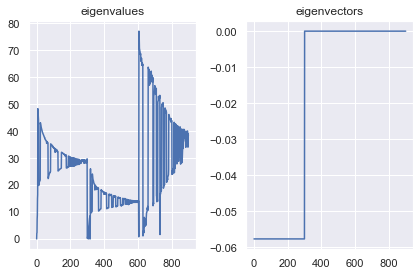

In [37]:
fig = plt.figure()
ax1 = plt.subplot(121)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 10e-6)[0]
ax2 = plt.subplot(122)
plt.plot(v[:, i[0]])
ax2.title.set_text('eigenvectors')
fig.tight_layout()
plt.show()

In [38]:
df=pd.read_csv('Circle.csv',names=["a", "b"], encoding='latin-1')

**Question 6,7,8,9 ($\boldsymbol{k=40}$ , CD)**

In [39]:
#Compute the clusters for the Circle dataset with K-means method 
algorithm = (KMeans(n_clusters = 3,init='k-means++', n_init = 40 ,max_iter=100,
                        tol=0.0001,  random_state= 50  , algorithm='elkan') ) 
algorithm.fit(df)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [40]:
X1 = df[['a','b']].iloc[: , :].values

In [41]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

c:\users\sadaf\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


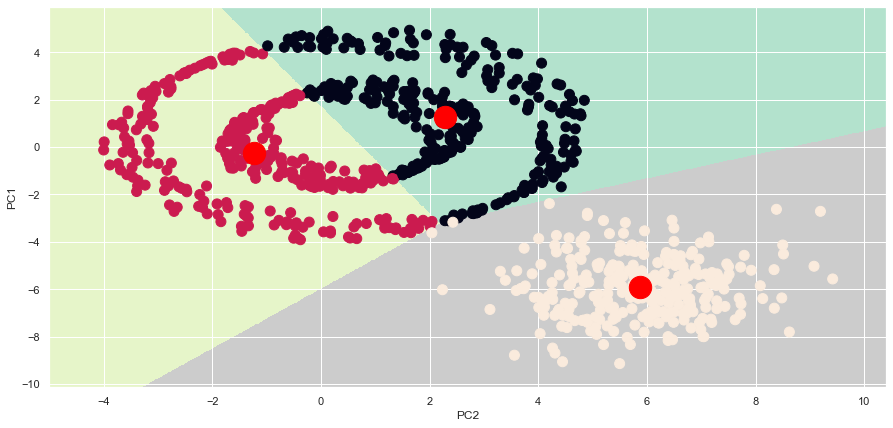

In [42]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'a', y = 'b', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 500, c = 'red' , alpha = 1)
plt.ylabel('PC1') , plt.xlabel('PC2')
plt.show()

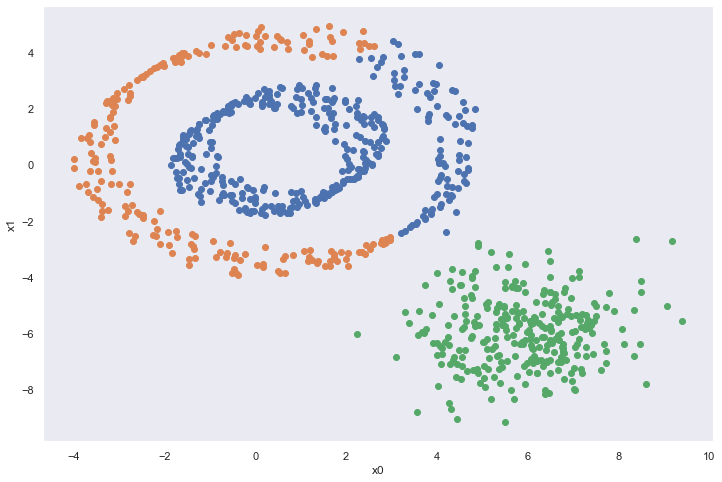

In [43]:
#Compute the clusters for the Circle dataset with clustering method 
from sklearn.cluster import SpectralClustering
sine_dataset = pd.DataFrame(df)

## Fitting spectral clustering with 3 clusters
spectral_clustering = SpectralClustering(n_clusters = 3, 
                                         affinity = 'nearest_neighbors',
                                         n_neighbors = 40).fit(df) 

## Appending cluster to the sine dataset
sine_dataset['spectral_clusters'] = spectral_clustering.labels_


## Visualizing the data with cluster
colors = ['lightblue', 'orange']

plt.figure(figsize = (12, 8))
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()

for c in sine_dataset['spectral_clusters'].unique():
        
        temp = sine_dataset[sine_dataset['spectral_clusters'] == c]
        plt.scatter(temp['a'], temp['b'])

# load the Spiral Dataset(SD)

In [44]:
df=pd.read_csv('Spiral.csv',names=["a", "b", "cluster"], encoding='latin-1')
df

,a,b,cluster
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3
...,...,...,...
307,15.75,13.85,2
308,15.65,14.05,2
309,15.65,14.25,2
310,15.65,14.50,2


In [45]:
dz=df.drop(['cluster'], axis=1)

## $\boldsymbol{k=10}$ in Spiral dataset

**Question1 ($\boldsymbol{k=10}$ SD)**

In [46]:
#construct the k-nearest neighborhood similarity graph and its adjacency matrix 
from sklearn.neighbors import radius_neighbors_graph
W = radius_neighbors_graph(dz,1,mode='distance', metric='minkowski', p=10, metric_params=None, include_self=False) #k=p=10
W = W.toarray()
print("The adjacency matrix is: ")
W

The adjacency matrix is: 


array([[0.000, 0.810, 0.000, ..., 0.000, 0.000, 0.000],
       [0.810, 0.000, 0.728, ..., 0.000, 0.000, 0.000],
       [0.000, 0.728, 0.000, ..., 0.000, 0.000, 0.000],
       ...,
       [0.000, 0.000, 0.000, ..., 0.000, 0.250, 0.350],
       [0.000, 0.000, 0.000, ..., 0.250, 0.000, 0.100],
       [0.000, 0.000, 0.000, ..., 0.350, 0.100, 0.000]])

In [47]:
#Constructing the degree matrix (𝐷)
D = np.diag(W.sum(axis=1))
print(D)

[[0.810 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 1.537 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 1.494 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 3.400 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 2.300 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 2.700]]


**Question2 ($\boldsymbol{k=10}$ ,SD)**

In [48]:
from scipy.sparse import csgraph

# with the function below we can get the Laplacian Matrix(L=D-W) from the adjacency matrix we have from previous section
L = csgraph.laplacian(W, normed=False)

print('The Laplacian Matrix L is: ')
print(L)

print('The first 5 values of L are: ')
print(L[:5,:5])

The Laplacian Matrix L is: 
[[0.810 -0.810 -0.000 ... -0.000 -0.000 -0.000]
 [-0.810 1.537 -0.728 ... -0.000 -0.000 -0.000]
 [-0.000 -0.728 1.494 ... -0.000 -0.000 -0.000]
 ...
 [-0.000 -0.000 -0.000 ... 3.400 -0.250 -0.350]
 [-0.000 -0.000 -0.000 ... -0.250 2.300 -0.100]
 [-0.000 -0.000 -0.000 ... -0.350 -0.100 2.700]]
The first 5 values of L are: 
[[0.810 -0.810 -0.000 -0.000 -0.000]
 [-0.810 1.537 -0.728 -0.000 -0.000]
 [-0.000 -0.728 1.494 -0.766 -0.000]
 [-0.000 -0.000 -0.766 1.567 -0.800]
 [-0.000 -0.000 -0.000 -0.800 1.651]]


**Question3 ($\boldsymbol{k=10}$ , SD)**

In [49]:
#compute the cosine similarity to determine how many connected components there are in the similarity graph
# import required libraries
from numpy.linalg import norm
 
# compute  similarity
cosine = np.dot(df['a'],df['b'])/(norm(df['a'],)*norm(df['b']))
print(" Similarity:", cosine)

 Similarity: 0.8575754202341677


**Question4 ($\boldsymbol{k=10}$ , SD)**

In [50]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# normalised eigenvectors
print('M eigenvectors:')
print(v)

eigenvalues:
[3.310 2.954 2.589 2.131 1.628 1.126 0.680 -0.000 0.081 0.312 0.000 0.001
 0.005 0.013 0.030 0.038 0.057 0.077 0.101 0.139 0.160 0.198 0.223 0.261
 0.332 0.393 0.411 0.494 0.530 0.569 0.672 0.720 0.757 0.824 0.918 0.958
 1.012 1.115 1.146 1.210 1.956 1.347 1.400 1.427 1.557 1.530 1.657 3.520
 2.330 2.272 2.214 2.113 2.146 2.141 2.042 1.965 1.926 1.661 1.860 1.778
 1.790 3.222 2.435 1.808 9.409 2.986 2.668 2.658 2.499 2.557 2.594 2.679
 8.900 7.845 3.403 3.179 7.042 7.236 6.348 5.768 5.487 5.127 4.496 4.163
 3.397 2.784 3.129 3.054 2.925 2.556 2.497 2.690 5.065 5.011 4.892 3.757
 3.844 4.663 4.520 4.469 4.349 3.966 4.079 4.207 4.103 4.140 8.815 8.176
 6.991 6.694 6.327 6.116 5.872 5.731 5.502 5.050 4.900 5.987 4.738 4.615
 4.659 5.436 5.242 4.887 4.377 4.593 4.439 4.093 4.024 3.992 4.472 4.403
 4.349 4.317 4.226 4.135 4.079 3.701 3.590 3.582 3.485 3.913 3.821 3.325
 3.688 0.062 0.043 0.032 0.021 0.012 0.004 0.001 -0.000 -0.000 3.440 3.624
 3.165 3.534 3.555 0.526 0.478 0.42

**Question5 ($\boldsymbol{k=10}$ , SD)**

In [51]:
# construct the matrix U 
u=v+L
print("the U matrix is: ")
print(u)

the U matrix is: 
[[0.795 -0.899 -0.230 ... 0.000 0.000 0.000]
 [-0.763 1.775 -0.223 ... 0.000 0.000 0.000]
 [-0.096 -1.090 1.020 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 3.400 -0.250 -0.350]
 [0.000 0.000 0.000 ... -0.250 2.300 -0.100]
 [0.000 0.000 0.000 ... -0.350 -0.100 2.700]]


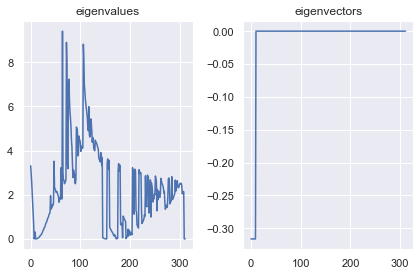

In [52]:
fig = plt.figure()
ax1 = plt.subplot(121)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 10e-6)[0]
ax2 = plt.subplot(122)
plt.plot(v[:, i[0]])
ax2.title.set_text('eigenvectors')
fig.tight_layout()
plt.show()

I run the k-means algorithm on the Spiral dataset to try to get some clusters. I select the number of cluster using the **Elbow method** by considering the inertia (sum of squared distances of samples to their closest cluster center) as a function of the number of clusters.

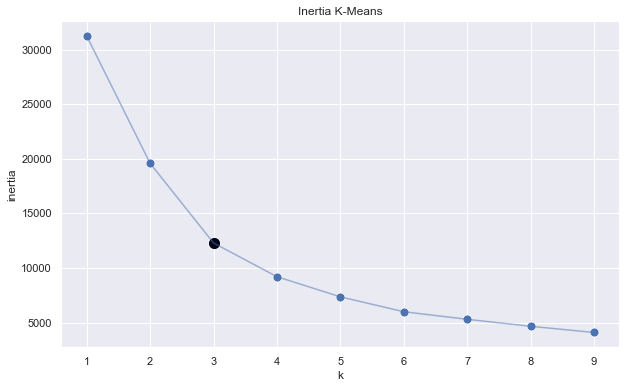

In [53]:
from sklearn.cluster import KMeans
import seaborn as sns
inertias = []

k_candidates = range(1, 10)

for k in k_candidates:
    k_means = KMeans(random_state=42, n_clusters=k)
    k_means.fit(dz)
    inertias.append(k_means.inertia_)

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=k_candidates, y = inertias, s=80, ax=ax)
sns.scatterplot(x=[k_candidates[2]], y = [inertias[2]], c=[3], s=150, ax=ax)
sns.lineplot(x=k_candidates, y = inertias, alpha=0.5, ax=ax)
ax.set(title='Inertia K-Means', ylabel='inertia', xlabel='k');

From this plot we see that $K=3$ is a good choice. Now I get the clusters.

**Question 6,7,8,9 ($\boldsymbol{k=10}$ , SD)**

In [54]:
#Compute the clusters for the Spiral dataset with K-means method 
algorithm = (KMeans(n_clusters = 3,init='k-means++', n_init = 10 ,max_iter=100,
                        tol=0.0001,  random_state= 50  , algorithm='elkan') )  
algorithm.fit(dz)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [55]:
X1 = dz[['a','b']].iloc[: , :].values

In [56]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

c:\users\sadaf\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


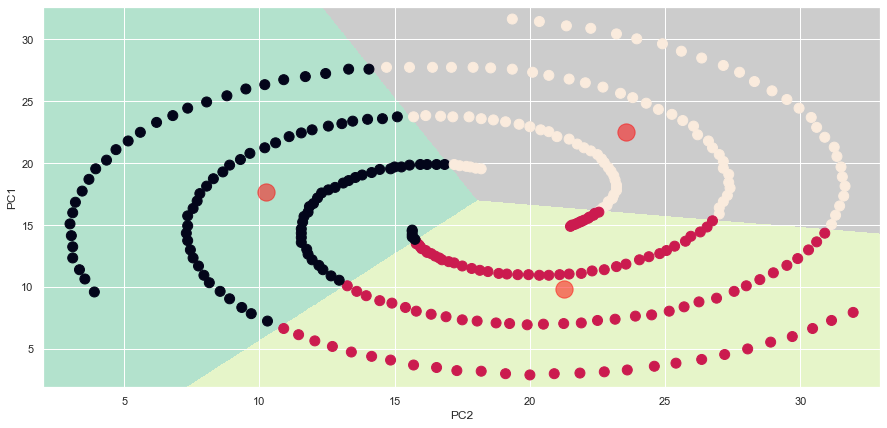

In [57]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'a', y = 'b', data = dz, c = labels1, s = 100)
#plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 500, c = 'red' , alpha = 1)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('PC1') , plt.xlabel('PC2')
plt.show()



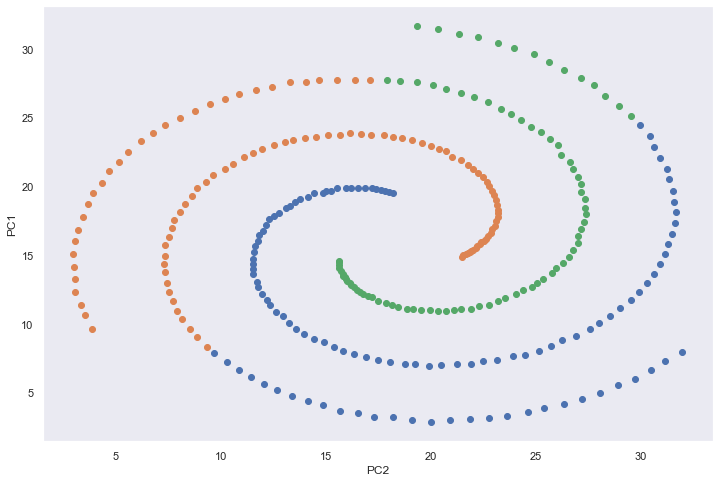

In [58]:
#Compute the clusters for the Spiral dataset with clustering method 
from sklearn.cluster import SpectralClustering
sine_dataset = pd.DataFrame(dz)

## Fitting spectral clustering with 3 clusters
spectral_clustering = SpectralClustering(n_clusters = 3, 
                                         affinity = 'nearest_neighbors',
                                         n_neighbors = 10).fit(dz)  

## Appending cluster to the sine dataset
sine_dataset['spectral_clusters'] = spectral_clustering.labels_


## Visualizing the data with cluster
colors = ['lightblue', 'orange']

plt.figure(figsize = (12, 8))
plt.xlabel('PC2')
plt.ylabel('PC1')
plt.grid()

for c in sine_dataset['spectral_clusters'].unique():
        
        temp = sine_dataset[sine_dataset['spectral_clusters'] == c]
        plt.scatter(temp['a'], temp['b'])

## $\boldsymbol{k=20}$ in Spiral dataset

**Question1 ($\boldsymbol{k=20}$ , SD)**

In [59]:
#construct the k-nearest neighborhood similarity graph and its adjacency matrix 
from sklearn.neighbors import radius_neighbors_graph
W = radius_neighbors_graph(dz,1,mode='distance', metric='minkowski', p=20, metric_params=None, include_self=False) # k=p=20
W = W.toarray()
print("The adjacency matrix is: ")
W

The adjacency matrix is: 


array([[0.000, 0.801, 0.000, ..., 0.000, 0.000, 0.000],
       [0.801, 0.000, 0.707, ..., 0.000, 0.000, 0.000],
       [0.000, 0.707, 0.000, ..., 0.000, 0.000, 0.000],
       ...,
       [0.000, 0.000, 0.000, ..., 0.000, 0.250, 0.350],
       [0.000, 0.000, 0.000, ..., 0.250, 0.000, 0.100],
       [0.000, 0.000, 0.000, ..., 0.350, 0.100, 0.000]])

In [60]:
#Constructing the degree matrix (𝐷)
D = np.diag(W.sum(axis=1))
print(D)

[[0.801 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 1.508 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 1.459 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 3.400 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 3.300 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 2.700]]


**Question2 ($\boldsymbol{k=20}$ , SD)**

In [61]:
from scipy.sparse import csgraph

# with the function below we can get the Laplacian Matrix(L=D-W) from the adjacency matrix we have from previous section
L = csgraph.laplacian(W, normed=False)

print('The Laplacian Matrix L is: ')
print(L)

print('The first 5 values of L are: ')
print(L[:5,:5])

The Laplacian Matrix L is: 
[[0.801 -0.801 -0.000 ... -0.000 -0.000 -0.000]
 [-0.801 1.508 -0.707 ... -0.000 -0.000 -0.000]
 [-0.000 -0.707 1.459 ... -0.000 -0.000 -0.000]
 ...
 [-0.000 -0.000 -0.000 ... 3.400 -0.250 -0.350]
 [-0.000 -0.000 -0.000 ... -0.250 3.300 -0.100]
 [-0.000 -0.000 -0.000 ... -0.350 -0.100 2.700]]
The first 5 values of L are: 
[[0.801 -0.801 -0.000 -0.000 -0.000]
 [-0.801 1.508 -0.707 -0.000 -0.000]
 [-0.000 -0.707 1.459 -0.752 -0.000]
 [-0.000 -0.000 -0.752 1.552 -0.800]
 [-0.000 -0.000 -0.000 -0.800 1.650]]


**Question3 ($\boldsymbol{k=20}$ , SD)**

In [62]:
#compute the cosine similarity to determine how many connected components there are in the similarity graph
# import required libraries
from numpy.linalg import norm

# compute  similarity
cosine = np.dot(df['a'],df['b'])/(norm(df['a'],)*norm(df['b']))
print(" Similarity:", cosine)

 Similarity: 0.8575754202341677


**Question4 ($\boldsymbol{k=20}$ , SD)**

In [63]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# normalised eigenvectors
print('M eigenvectors:')
print(v)

eigenvalues:
[3.307 2.936 2.556 2.118 1.618 1.120 0.675 0.000 0.080 0.309 3.520 3.222
 2.985 2.667 2.492 2.232 2.078 1.888 1.626 1.367 1.136 0.899 0.683 0.495
 0.319 0.000 0.021 0.081 0.182 9.302 8.799 7.756 0.000 0.003 0.011 0.033
 0.047 0.087 0.117 0.164 0.217 0.254 0.345 0.484 0.521 0.578 0.664 0.791
 0.872 0.946 1.109 1.271 1.332 1.390 1.507 1.575 2.400 2.268 1.695 1.711
 2.175 1.832 1.852 1.993 1.953 2.113 2.126 1.790 6.968 7.116 6.257 5.736
 5.460 5.085 5.027 4.410 2.553 2.657 2.563 3.390 3.406 3.332 3.151 2.666
 3.108 3.053 2.978 4.928 2.482 2.533 2.909 2.677 2.706 4.798 4.575 4.440
 4.413 4.302 3.738 3.826 4.065 4.164 3.959 4.090 4.082 4.017 8.871 8.121
 6.946 6.656 6.283 6.164 6.012 5.834 5.576 5.154 5.986 4.976 5.718 4.715
 5.221 4.698 4.597 4.530 4.909 4.089 3.984 3.692 4.030 4.686 4.348 4.024
 4.543 4.378 4.384 4.314 4.233 4.163 4.109 3.978 3.938 3.820 3.794 3.595
 3.486 3.570 3.398 3.316 3.621 3.576 3.184 3.456 3.112 3.334 0.102 0.241
 0.163 0.201 0.367 0.415 0.922 0.503 0

**Question5 ($\boldsymbol{k=20}$ , SD)**

In [64]:
# construct the matrix U 
u=v+L
print("the U matrix is: ")
print(u)

the U matrix is: 
[[0.788 -0.879 0.230 ... 0.000 0.000 0.000]
 [-0.761 1.716 -1.212 ... 0.000 0.000 0.000]
 [-0.086 -1.040 1.947 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 3.400 -0.250 -0.350]
 [0.000 0.000 0.000 ... -0.250 3.300 -0.100]
 [0.000 0.000 0.000 ... -0.350 -0.100 2.700]]


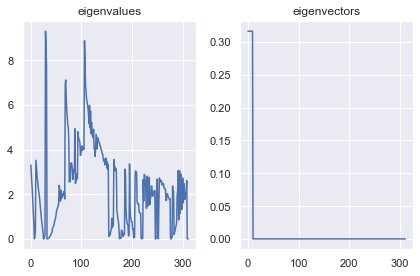

In [65]:
fig = plt.figure()
ax1 = plt.subplot(121)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 10e-6)[0]
ax2 = plt.subplot(122)
plt.plot(v[:, i[0]])
ax2.title.set_text('eigenvectors')
fig.tight_layout()
plt.show()

In [66]:
df=pd.read_csv('Spiral.csv',names=["a", "b", "cluster"], encoding='latin-1')
dz=df.drop(['cluster'], axis=1)

**Question 6,7,8,9 ($\boldsymbol{k=20}$ , SD)**

In [67]:
#Compute the clusters for the Spiral dataset with K-means method 
algorithm = (KMeans(n_clusters = 3,init='k-means++', n_init = 20 ,max_iter=100,
                        tol=0.0001,  random_state= 50  , algorithm='elkan') )
algorithm.fit(dz)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [68]:
X1 = dz[['a','b']].iloc[: , :].values

In [69]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

c:\users\sadaf\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


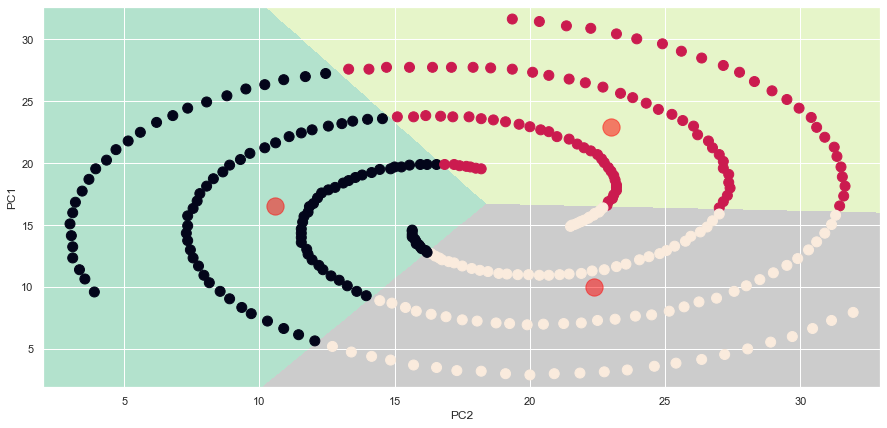

In [70]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'a', y = 'b', data = dz, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('PC1') , plt.xlabel('PC2')
plt.show()

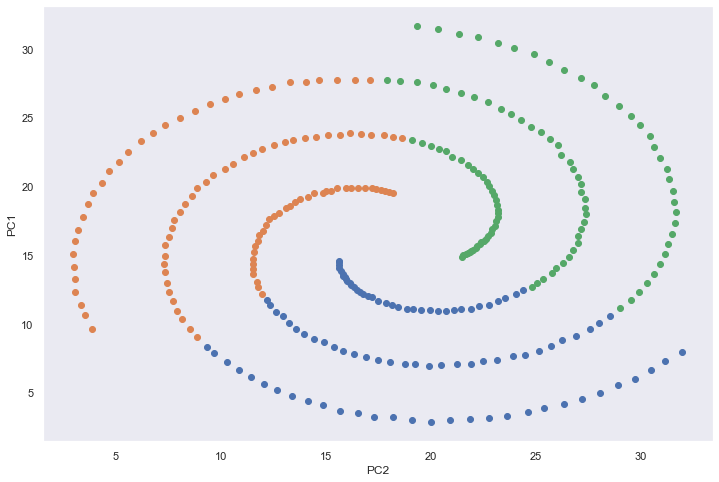

In [71]:
#Compute the clusters for the Circle dataset with clustering method 
from sklearn.cluster import SpectralClustering
sine_dataset = pd.DataFrame(dz)

## Fitting spectral clustering with 3 clusters
spectral_clustering = SpectralClustering(n_clusters = 3, 
                                         affinity = 'nearest_neighbors',
                                         n_neighbors = 20).fit(dz) 

## Appending cluster to the sine dataset
sine_dataset['spectral_clusters'] = spectral_clustering.labels_


## Visualizing the data with cluster
colors = ['lightblue', 'orange']

plt.figure(figsize = (12, 8))
plt.xlabel('PC2')
plt.ylabel('PC1')
plt.grid()

for c in sine_dataset['spectral_clusters'].unique():
        
        temp = sine_dataset[sine_dataset['spectral_clusters'] == c]
        plt.scatter(temp['a'], temp['b'])

## $\boldsymbol{k=40}$ in Spiral dataset

**Question1 ($\boldsymbol{k=40}$ , SD)**

In [72]:
#construct the k-nearest neighborhood similarity graph and its adjacency matrix 
from sklearn.neighbors import radius_neighbors_graph
W = radius_neighbors_graph(dz,1,mode='distance', metric='minkowski', p=40, metric_params=None, include_self=False) #k=p=40
W = W.toarray()
print("The adjacency matrix is: ")
W

The adjacency matrix is: 


array([[0.000, 0.800, 0.000, ..., 0.000, 0.000, 0.000],
       [0.800, 0.000, 0.701, ..., 0.000, 0.000, 0.000],
       [0.000, 0.701, 0.000, ..., 0.000, 0.000, 0.000],
       ...,
       [0.000, 0.000, 0.000, ..., 0.000, 0.250, 0.350],
       [0.000, 0.000, 0.000, ..., 0.250, 0.000, 0.100],
       [0.000, 0.000, 0.000, ..., 0.350, 0.100, 0.000]])

In [73]:
#Constructing the degree matrix (𝐷)
D = np.diag(W.sum(axis=1))
print(D)

[[0.800 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 1.501 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 1.451 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 4.400 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 3.300 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 2.700]]


**Question2 ($\boldsymbol{k=40}$ , SD)**

In [74]:
from scipy.sparse import csgraph

# with the function below we can get the Laplacian Matrix(L=D-W) from the adjacency matrix we have from previous section
L = csgraph.laplacian(W, normed=False)

print('The Laplacian Matrix L is: ')
print(L)

print('The first 5 values of L are: ')
print(L[:5,:5])

The Laplacian Matrix L is: 
[[0.800 -0.800 -0.000 ... -0.000 -0.000 -0.000]
 [-0.800 1.501 -0.701 ... -0.000 -0.000 -0.000]
 [-0.000 -0.701 1.451 ... -0.000 -0.000 -0.000]
 ...
 [-0.000 -0.000 -0.000 ... 4.400 -0.250 -0.350]
 [-0.000 -0.000 -0.000 ... -0.250 3.300 -0.100]
 [-0.000 -0.000 -0.000 ... -0.350 -0.100 2.700]]
The first 5 values of L are: 
[[0.800 -0.800 -0.000 -0.000 -0.000]
 [-0.800 1.501 -0.701 -0.000 -0.000]
 [-0.000 -0.701 1.451 -0.750 -0.000]
 [-0.000 -0.000 -0.750 1.550 -0.800]
 [-0.000 -0.000 -0.000 -0.800 1.650]]


**Question3 ($\boldsymbol{k=40}$ , SD)**

In [75]:
#compute the cosine similarity to determine how many connected components there are in the similarity graph
# import required libraries
from numpy.linalg import norm
 
# compute  similarity
cosine = np.dot(df['a'],df['b'])/(norm(df['a'],)*norm(df['b']))
print(" Similarity:", cosine)

 Similarity: 0.8575754202341677


**Question4 ($\boldsymbol{k=40}$ , SD)**

In [76]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# normalised eigenvectors
print('M eigenvectors:')
print(v)

eigenvalues:
[3.578 3.427 3.258 3.111 2.968 2.818 2.625 2.523 2.377 2.227 2.107 2.002
 1.839 1.654 1.505 1.373 1.191 1.045 0.905 0.750 0.627 0.498 0.392 0.292
 0.000 0.009 0.034 0.075 0.132 0.205 4.385 4.027 0.000 0.006 0.023 0.051
 0.110 0.146 0.230 0.257 0.382 0.523 0.589 0.728 0.854 0.989 3.403 3.383
 1.172 3.142 3.033 1.282 1.384 1.435 1.590 1.616 1.812 1.869 1.979 2.044
 2.140 2.260 2.369 2.654 2.663 2.546 2.554 2.537 9.280 8.769 0.000 0.061
 0.262 0.627 7.735 1.170 7.079 6.955 1.558 1.775 6.223 5.867 2.172 5.588
 5.412 2.462 2.581 2.763 2.800 2.995 3.213 3.345 3.450 3.646 5.027 4.939
 3.801 4.822 4.747 3.991 4.050 4.549 4.229 4.300 4.349 4.389 3.542 3.096
 3.133 2.999 2.862 2.791 2.686 2.617 2.486 2.402 2.303 2.117 1.969 1.814
 1.706 1.574 1.451 1.320 1.182 1.014 0.871 0.758 0.636 0.519 0.415 0.324
 -0.000 0.007 0.027 0.062 0.108 0.169 0.239 4.353 4.149 3.664 3.476 2.994
 0.000 0.007 0.035 0.089 0.168 0.260 0.332 0.459 0.602 2.965 0.758 0.950
 1.046 2.599 2.472 2.449 2.295 2.187 

**Question5 ($\boldsymbol{k=40}$  SD)**

In [77]:
# construct the matrix U 
u=v+L
print("the U matrix is: ")
print(u)

the U matrix is: 
[[0.799 -0.804 -0.011 ... 0.000 0.000 0.000]
 [-0.798 1.512 -0.667 ... 0.000 0.000 0.000]
 [-0.006 -0.728 1.380 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 4.400 -0.250 -0.350]
 [0.000 0.000 0.000 ... -0.250 3.300 -0.100]
 [0.000 0.000 0.000 ... -0.350 -0.100 2.700]]


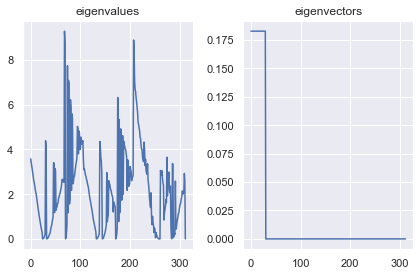

In [78]:
fig = plt.figure()
ax1 = plt.subplot(121)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 10e-6)[0]
ax2 = plt.subplot(122)
plt.plot(v[:, i[0]])
ax2.title.set_text('eigenvectors')
fig.tight_layout()
plt.show()

In [79]:
df=pd.read_csv('Spiral.csv',names=["a", "b", "cluster"], encoding='latin-1')
dz=df.drop(['cluster'], axis=1)

**Question 6,7,8,9 ($\boldsymbol{k=40}$ , SD)**

In [80]:
#Compute the clusters for the Spiral dataset with K-means method 
algorithm = (KMeans(n_clusters = 3,init='k-means++', n_init = 40 ,max_iter=100,
                        tol=0.0001,  random_state= 50  , algorithm='elkan') ) 
algorithm.fit(dz)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [81]:
X1 = dz[['a','b']].iloc[: , :].values

In [82]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

c:\users\sadaf\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


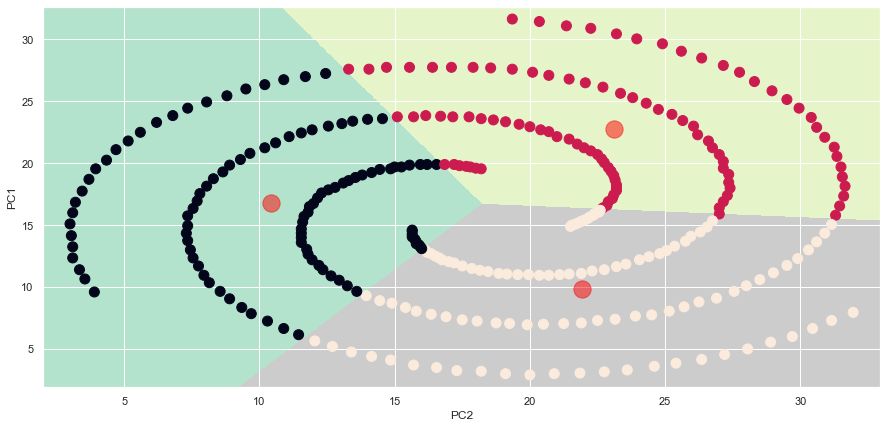

In [83]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'a', y = 'b', data = dz, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('PC1') , plt.xlabel('PC2')
plt.show()

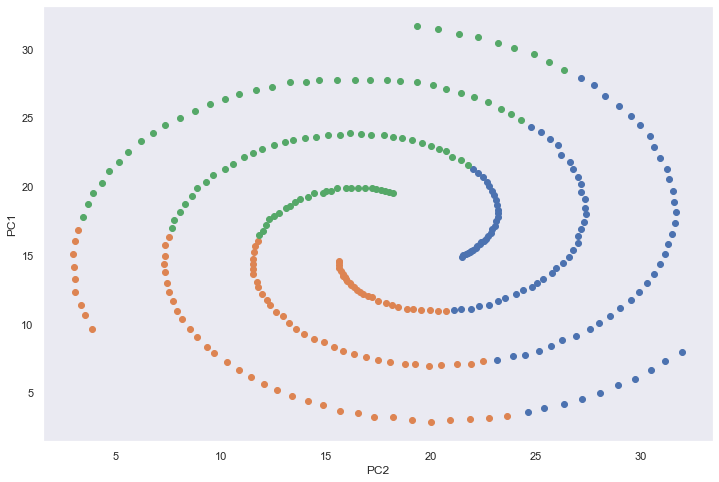

In [84]:
#Compute the clusters for the Spiral dataset with clustering method 
from sklearn.cluster import SpectralClustering
sine_dataset = pd.DataFrame(dz)

## Fitting spectral clustering with 3 clusters
spectral_clustering = SpectralClustering(n_clusters = 3, 
                                         affinity = 'nearest_neighbors',
                                         n_neighbors = 40).fit(dz) 

## Appending cluster to the sine dataset
sine_dataset['spectral_clusters'] = spectral_clustering.labels_


## Visualizing the data with cluster
colors = ['lightblue', 'orange']

plt.figure(figsize = (12, 8))
plt.xlabel('PC2')
plt.ylabel('PC1')
plt.grid()

for c in sine_dataset['spectral_clusters'].unique():
        
        temp = sine_dataset[sine_dataset['spectral_clusters'] == c]
        plt.scatter(temp['a'], temp['b'])

# Conclution
In a nutshell, The ideal number of clusters employing the Elbow method was generally found to be three.
By adjusting k, the clustering algorithm in the Circle dataset experiences barely perceptible variations in the K-means algorithm. While K=10 and K=20 show similar changes in the Spectral Clustering algorithm, the result is not very surprising since k-means generates convex clusters there are few differences between the two. However, K=40 made a clustering error and mistook some of the orange spots for blue.
In the Spectral Clustering algorithm of the Spiral dataset, K=10 shows poorly grouped points, K=20 shows a small error in the green cluster, and K=40 shows perfectly clustered points.
In the k-means, there is no clustering by altering k, and nearly all of the points are correctly categorized.

# Future Prospect 
**improving K-means clustering with a density-based clustering algorithm like DBSCAN**

K-Means clustering may cluster loosely related observations together. Every observation becomes a part of some cluster eventually, even if the observations are scattered far away in the vector space. Since clusters depend on the mean value of cluster elements, each data point plays a role in forming the clusters. A slight change in data points might affect the clustering outcome. This problem is greatly reduced in DBSCAN due to the way clusters are formed. This is usually not a big problem unless we come across some odd shape data.

Another challenge with k-means is that we need to specify the number of clusters (“k”) in order to use it. Much of the time, we won’t know what a reasonable k value is a priori.

What’s nice about DBSCAN is that we don’t have to specify the number of clusters to use it. All we need is a function to calculate the distance between values and some guidance for what amount of distance is considered “close”. DBSCAN also produces more reasonable results than k-means across a variety of different distributions. 